[2 2 2 ... 9 5 0]
2


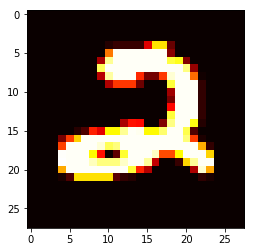

[0 0 0 ... 3 8 4]
0


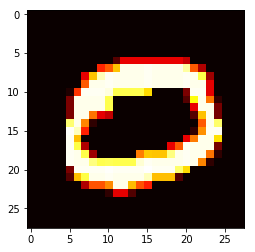

[9 9 9 ... 0 0 0]
9


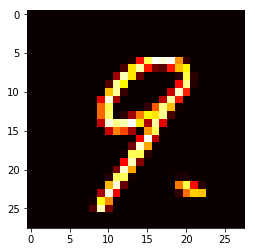

[9 9 4 ... 0 0 0]
9


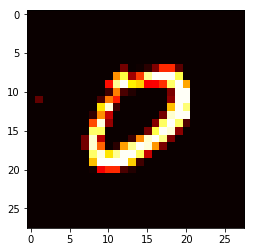

[3 3 3 ... 0 0 0]
3


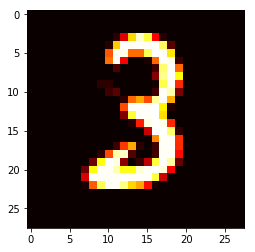

[7 7 7 ... 2 0 0]
7


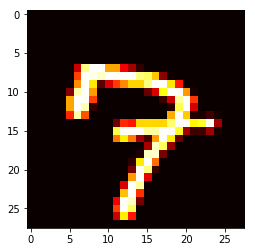

[0 0 0 ... 8 6 4]
0


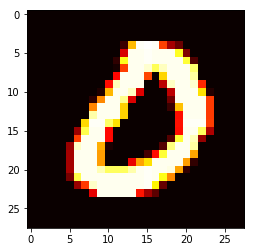

[3 3 3 ... 0 0 0]
3


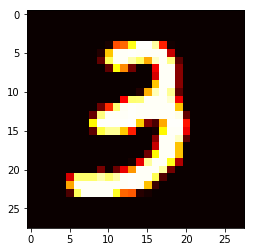

[0 0 0 ... 2 2 2]
0


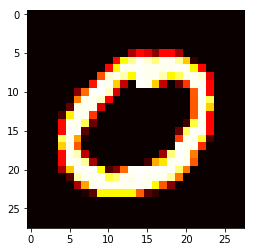

In [2]:
import numpy as np
#import tensorflow as ts
import matplotlib.pyplot as plt

m = int(28)            # This is the width and height of the square image, in pixels. The area of image is m*m pixels. 

# Part 1.a

# Open data (labels and features as "train")
with open ('train.csv') as train:
    
    #create array from lines in "train" object
    train_raw = np.array (train.readlines()[0:2000])
    # create unprocessed array (i.e.: labels, column names and features are still included)
    train_raw = np.array([i.split(',') for i in train_raw])
    
    # process array of features (i.e.: remove features, remove column names and keep labels)
    labels_train = np.array([int(i[0]) for i in train_raw[1:]],dtype=np.int)
    
    # process array of features (i.e.: remove labels, remove column names and apply m x m reshapeing the feature set)
    # data type for features is floating
    features_train = np.array([np.reshape(i,(m,m)) for i in train_raw[1:,1:]],dtype=np.float)

with open ('test.csv') as test:
    
    #create array from lines in "test" object
    test_raw = np.array (test.readlines()[0:10])
    # create unprocessed array (i.e.: labels, column names and features are still included)
    test_raw = np.array([i.split(',') for i in test_raw])
    # process array of features (i.e.: remove features, remove column names and keep labels)

    # process array of features (i.e.: remove column names and apply m x m reshapeing the feature set)
    # data type for features is floating
    features_test = np.array([np.reshape(i,(m,m)) for i in test_raw[1:,:]],dtype=np.float)   
   # print(features_test)
  
k_par = 3
dist_array = np.zeros([len(features_test),len(features_train),2],dtype=np.int)
for j,p in enumerate(features_test):
    for i,k in enumerate(features_train):
        dist_array[j,i][0] = np.dot(np.reshape(features_test[j] - features_train[i],(1,m*m))  ,  np.transpose(np.reshape(features_test[j] - features_train[i],(1,m*m))))
        dist_array[j,i][1] = labels_train[i]
    #print(dist_array[j,:,0])
    
    print(labels_train[np.argsort(dist_array[j,:,0])])
    sort_dist_array=labels_train[np.argsort(dist_array[j,:,0])]
    a = np.array(sort_dist_array[0:k_par])
    counts = np.bincount(a)
    print (np.argmax(counts))
    plt.imshow(features_test[j], cmap='hot', interpolation='nearest')
    plt.show()

    